In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
#Creating 10 intervals between 0-1 with step 0.1
#This would help us to assume 10 prior values of theta 
interval = np.round(np.linspace(0,1,11),3).tolist()
print(interval)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [3]:
#values for probability of perceiving horizontal are assumed to be centers of these intervals
Ptheta = [round((interval[i] + interval[i+1]) / 2,2) for i in range(len(interval)-1)]
print(Ptheta)

[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]


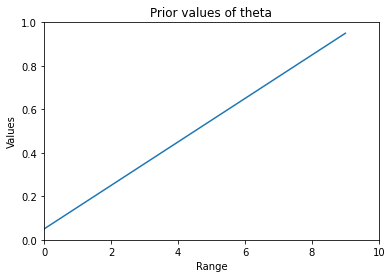

In [18]:
#Plotting the 27 trial Posterier values when prior is 0.05
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.plot(Ptheta)
plt.title('Prior values of theta')
plt.xlabel('Range')
plt.ylabel('Values')

plt.show()

In [4]:
#As per problem statement, the number of trials are chosen as 27. 
#Among them, 17 are perceived as Horizontal(1) and remaining 10 are perceived as vertical(0)
horizontal = np.ones(17,dtype=int).tolist()
vertical = np.zeros(10,dtype=int).tolist()
trails = horizontal+vertical
#shuffling the horizontal/vertical choices randomly
random.seed(42)
trials = random.shuffle(trails)
print(trails)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]


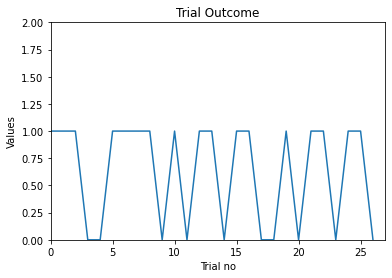

In [19]:
#Plotting the 27 trial Posterier values when prior is 0.05
plt.xlim([0, 27])
plt.ylim([0, 2])
plt.plot(trails)
plt.title('Trial Outcome')
plt.xlabel('Trial no')
plt.ylabel('Values')

plt.show()

In [5]:
#posterior = likelihood * prior / marginal 
def bayesian(lke,prior,marg):
  return (lke * prior)/marg

In [6]:
#Final prosterior after 27 trials for each value of probability of perceiving horizontal
final_posterior = []

#prosterior after each trials for each value of probability of perceiving horizontal
trial_posterior =  []

#assuming conditional probability P(h|p(theta)) uniformly (likelihood is fixed as 0.5)
likelihood = 0.5

#for counting the values of perceiving horizontal for total evidence
hcount = 0

#initial posterior
post = 0

#for each value of prior (i.e. 0.05, 0.15 etc..)
for prior in Ptheta:
  xz= []

  #for each trial one evidence is instantiated 
  for i,horz in enumerate(trails):
    
    #checking if the evidence is horizontal
    if(horz==1):
      hcount += 1
    
    #calculating the marginal probability
    marg = hcount/(i+1)

    #calculating posterior probability
    post = bayesian(likelihood, prior, marg)
    xz.append(post)

  trial_posterior.append(xz)

  final_posterior.append(post)  
  post = 0
  hcount = 0

In [21]:
#for first 27 trial with prior value = 0.05
trial_posterior[0]

[0.025,
 0.025,
 0.025,
 0.03333333333333333,
 0.04166666666666667,
 0.037500000000000006,
 0.035,
 0.03333333333333333,
 0.03214285714285715,
 0.03571428571428572,
 0.034375,
 0.037500000000000006,
 0.036111111111111115,
 0.035,
 0.037500000000000006,
 0.03636363636363637,
 0.035416666666666666,
 0.037500000000000006,
 0.03958333333333334,
 0.038461538461538464,
 0.04038461538461539,
 0.03928571428571429,
 0.03833333333333334,
 0.04,
 0.0390625,
 0.03823529411764706,
 0.039705882352941174]

In [8]:
#for first 27 trial with prior value = 0.75
trial_posterior[7]

[0.375,
 0.375,
 0.375,
 0.5,
 0.625,
 0.5625,
 0.525,
 0.5,
 0.48214285714285715,
 0.5357142857142857,
 0.515625,
 0.5625,
 0.5416666666666666,
 0.525,
 0.5625,
 0.5454545454545454,
 0.53125,
 0.5625,
 0.59375,
 0.5769230769230769,
 0.6057692307692307,
 0.5892857142857143,
 0.575,
 0.6,
 0.5859375,
 0.5735294117647058,
 0.5955882352941176]

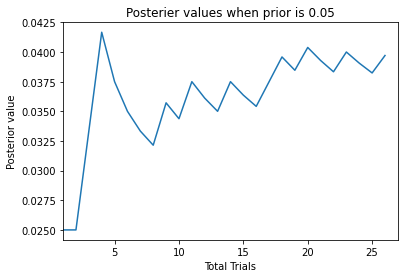

In [9]:
#Plotting the 27 trial Posterier values when prior is 0.05
plt.xlim([1, 27])
plt.plot(trial_posterior[0])
plt.title('Posterier values when prior is {}'.format(Ptheta[0]))
plt.xlabel('Total Trials')
plt.ylabel('Posterior value')

plt.show()

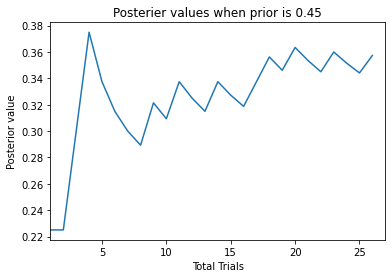

In [10]:
#Plotting the 27 trial Posterier values when prior is 0.45
plt.xlim([1, 27])
plt.plot(trial_posterior[4])
plt.title('Posterier values when prior is {}'.format(Ptheta[4]))
plt.xlabel('Total Trials')
plt.ylabel('Posterior value')

plt.show()

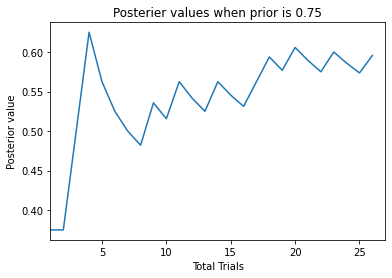

In [11]:
#Plotting the 27 trial Posterier values when prior is 0.75
plt.xlim([1, 27])
plt.plot(trial_posterior[7])
plt.title('Posterier values when prior is {}'.format(Ptheta[7]))
plt.xlabel('Total Trials')
plt.ylabel('Posterior value')

plt.show()

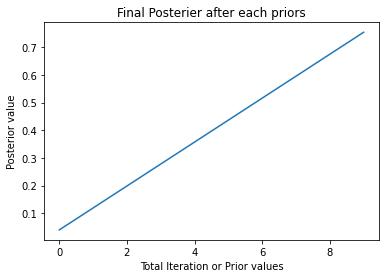

In [12]:
#Plotting the final Posterier values each prior i.e. 0.05,0.15,0.25 etc.
plt.plot(final_posterior)
plt.title('Final Posterier after each priors')
plt.xlabel('Total Iteration or Prior values')
plt.ylabel('Posterior value')

plt.show()

In [13]:
#Calculating expected value of theta for a round of 27 trail and specific prior
def estimate_theta(trial_outcome):
  return mean(trial_outcome)


In [23]:
#for each value of prior = 0.05, 0.15 etc  estimated theta values
for i in range(len(Ptheta)):
  theta_estimated = estimate_theta(trial_posterior[i])
  print('\n Prior theta: {} and estimated theta : {}'.format(Ptheta[i],round((theta_estimated),3)))


 Prior theta: 0.05 and estimated theta : 0.036

 Prior theta: 0.15 and estimated theta : 0.107

 Prior theta: 0.25 and estimated theta : 0.179

 Prior theta: 0.35 and estimated theta : 0.251

 Prior theta: 0.45 and estimated theta : 0.322

 Prior theta: 0.55 and estimated theta : 0.394

 Prior theta: 0.65 and estimated theta : 0.465

 Prior theta: 0.75 and estimated theta : 0.537

 Prior theta: 0.85 and estimated theta : 0.609

 Prior theta: 0.95 and estimated theta : 0.68
